In [31]:
import json
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

from state import State

In [32]:
def get_string_entry(question : str) -> str:
    """
    Prompt the user with a question and retrieve a string entry.

    Args:
        question (str): The question to prompt the user with.

    Returns:
        str: The string value entered by the user.
    """

    print(question)
    return input("Enter Selection >> ")

def get_int_entry(question : str) -> int:
    """
    Prompt the user with a question and retrieve an integer entry.

    Args:
        question (str): The question to prompt the user with.

    Returns:
        int: The integer value entered by the user.

    Raises:
        ValueError: If the user does not input a valid integer.
    """

    print(question)
    try:
        selection = int(input("Enter Value >> "))
        return selection
    except ValueError:
        print("Invalid entry.  Please specify a number.")
        return None

def is_null_or_whitespace(value : str) -> bool:
    """
    Checks if a string is None or consists only of whitespace characters.

    Args:
        value (str): The string to be checked.

    Returns:
        bool: True if the string is None or consists only of whitespace characters, False otherwise.
    """

    if value is None or len(value.strip()) == 0:
        return True

    return False

def get_yes_no(question : str) -> bool:
    """
    Prompt the user with a question and 
    return True if the user responds with 'yes' or 'y', False if 'no' or 'n'.

    Args:
        question (str): The question to prompt the user with.

    Returns:
        bool: True if the user answers affirmatively ('yes' or 'y'), False otherwise ('no' or 'n').
    """

    print(question)
    valid_options = ['yes', 'y', 'n', 'no']
    user_selection = input("Enter Selection >> ").lower()
    if user_selection in valid_options[:2]:
        return True
    if user_selection in valid_options[2:]:
        return False

    print("Invalid Selection")
    return None

def sort_by_name(states) -> list:
    """
    Sorts a list of states by name in alphabetical order.

    Parameters:
    - states (list): A list of State objects.

    Returns:
    - list: A new list of State objects sorted by name.
    """

    return sorted(states, key=lambda x: x.name.lower())

def sort_by_pop(states) -> list:
    """
    Sorts a list of states by population in descending order.

    Parameters:
    - states (list): A list of State objects.

    Returns:
    - list: A new list of State objects sorted by population.
    """

    return sorted(states, key=lambda x: x.population, reverse=True)

In [33]:
def find_first(list):
    """
    Finds the first element in the given list.

    Parameters:
    - lst (list): The list to search for the first element.

    Returns:
    - Any: The first element of the list if the list is not empty, else None.
    """
    
    for x in list:
        return x

    return None

In [34]:
def menu():
    """
    Display the menu options.

    Options:
    1) Display in alphabetical order
    2) Search for state
    3) Show bar graph of top 5 most populated states
    4) Update state population
    5) Exit
    """

    print("1) Display in alphabetical order")
    print("2) Search for state")
    print("3) Show bar graph of top 5 most populated states")
    print("4) Update state population")
    print("5) Exit") 

**************************************************
      Welcome to the python state application
**************************************************

1) Display in alphabetical order
2) Search for state
3) Show bar graph of top 5 most populated states
4) Update state population
5) Exit

Name : Alabama
Abbreviation : AL
Population : 5,143,033
Flower : Camellia

Name : Alaska
Abbreviation : AK
Population : 733,536
Flower : Forget-me-not

Name : Arizona
Abbreviation : AZ
Population : 7,497,004
Flower : Saguaro cactus blossom

Name : Arkansas
Abbreviation : AR
Population : 3,089,060
Flower : Apple blossom

Name : California
Abbreviation : CA
Population : 38,989,770
Flower : California poppy

Name : Colorado
Abbreviation : CO
Population : 5,914,181
Flower : Colorado blue columbine

Name : Connecticut
Abbreviation : CT
Population : 3,625,646
Flower : Mountain laurel

Name : Delaware
Abbreviation : DE
Population : 1,044,321
Flower : Peach blossom

Name : Florida
Abbreviation : FL
Population : 

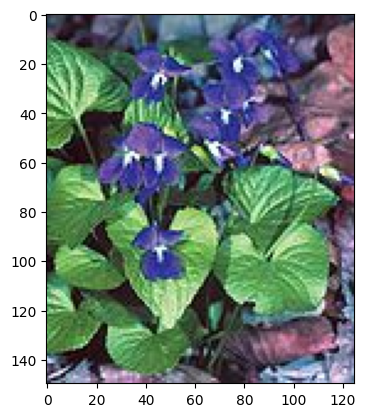

1) Display in alphabetical order
2) Search for state
3) Show bar graph of top 5 most populated states
4) Update state population
5) Exit

Thank you for using the Python State Application


In [35]:
def main():
    states = []
    j_data = {}
    with open('../state_data.json', 'r', encoding="utf-8") as i_file:
        j_data = json.load(i_file)

    for s in j_data:
        state = State()
        state.set_name(s['state'])
        state.population = int(s['population'])
        state.flower = s['flower']
        states.append(state)

    print('*' * 50 + "\n      Welcome to the python state application\n" + '*' * 50 + "\n")
    while True:
        menu()
        x = get_int_entry("")
        match x:
            case 1:
                states = sort_by_name(states)
                for s in states:
                    print(s)
            case 2:
                state_name = get_string_entry("Enter State Name")
                state = find_first(x for x in states if x.name == state_name or x.abbreviation == state_name.upper())
                if state is None:
                    print("State not found")
                else:
                    print(state)
                    img = np.asarray(Image.open('../' + state.flower_path))
                    plt.imshow(img)
                    plt.show()
            case 3:
                states = sort_by_pop(states)
                names = [x.name for x in states[:5]]
                values = [x.population for x in states[:5]]

                plt.figure(figsize=(10, 5))

                cont = plt.bar(names, values)
                plt.bar_label(cont, [f'{x:,}' for x in values])
                plt.ylim(0, 42000000)
                plt.ylabel("Population x 10,000,000")
                plt.xlabel("State")
                plt.show()
            case 4:
                state_name = get_string_entry("Enter State Name")
                state = find_first(x for x in states if x.name == state_name or x.abbreviation == state_name.upper())
                if state is None:
                    print("State not found")
                else:
                    new_pop = get_int_entry("Enter New Population")
                    if new_pop is not None and state.set_population(new_pop) == True:
                        print(f"Population for {state.name} is now set to {new_pop}")
                    else:
                        print("Failed to set population")
            case 5:
                break

    print("Thank you for using the Python State Application")   

main()